<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#detect-local-mode" data-toc-modified-id="detect-local-mode-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>detect local mode</a></span><ul class="toc-item"><li><span><a href="#KDE" data-toc-modified-id="KDE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KDE</a></span></li><li><span><a href="#noise-detecting" data-toc-modified-id="noise-detecting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>noise detecting</a></span></li></ul></li><li><span><a href="#topological-graph" data-toc-modified-id="topological-graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>topological graph</a></span></li><li><span><a href="#prune-graph" data-toc-modified-id="prune-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>prune graph</a></span></li><li><span><a href="#circles" data-toc-modified-id="circles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>circles</a></span></li><li><span><a href="#impossible" data-toc-modified-id="impossible-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>impossible</a></span></li><li><span><a href="#s-set1" data-toc-modified-id="s-set1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>s-set1</a></span></li><li><span><a href="#smile" data-toc-modified-id="smile-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>smile</a></span></li><li><span><a href="#moons" data-toc-modified-id="moons-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>moons</a></span></li><li><span><a href="#其他方法" data-toc-modified-id="其他方法-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>其他方法</a></span><ul class="toc-item"><li><span><a href="#谱聚类" data-toc-modified-id="谱聚类-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>谱聚类</a></span></li><li><span><a href="#meanshift" data-toc-modified-id="meanshift-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>meanshift</a></span></li><li><span><a href="#k-means" data-toc-modified-id="k-means-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>k-means</a></span></li><li><span><a href="#AgglomerativeClustering" data-toc-modified-id="AgglomerativeClustering-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>AgglomerativeClustering</a></span></li><li><span><a href="#AffinityPropagation" data-toc-modified-id="AffinityPropagation-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>AffinityPropagation</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#OPTICS" data-toc-modified-id="OPTICS-10.7"><span class="toc-item-num">10.7&nbsp;&nbsp;</span>OPTICS</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import normalize
import sys
import imp
from scipy.special import softmax,entr
import pandas as pd
import plot_tools

# load data

/usr/data/gzy/software/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



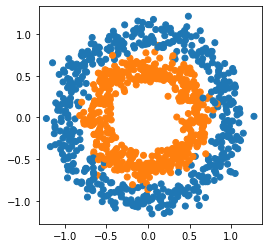

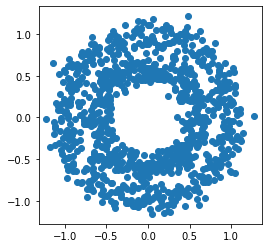

In [2]:
panda=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]
Y=panda.values[:,2]
Y[Y=='noise']=-1
Y=Y.astype(np.int)
plot_tools.autoPlot(X[:,:2],Y)
plot_tools.autoPlot(X[:,:2])

# detect local mode

## KDE

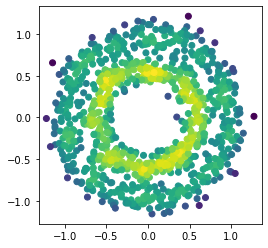

In [24]:
import detect_local_mode
imp.reload(detect_local_mode)
import KDE
imp.reload(KDE)

K_d=30
level=0.4
search_n=10

extend=np.zeros((X.shape[0],2))
extend[:,1]=range(0,X.shape[0])
X_extend=np.hstack([X,extend])

Dis,manifolds,connection,noise,P2M,draw_tasks=detect_local_mode.Manifold.get_manifolds(X_extend,K_d,level,search_n)
noise_manifold=manifolds[0]
manifolds=manifolds[1:]

plot_tools.autoPlot(X_extend[:,:2],X_extend[:,-2],continues=True)

## noise detecting

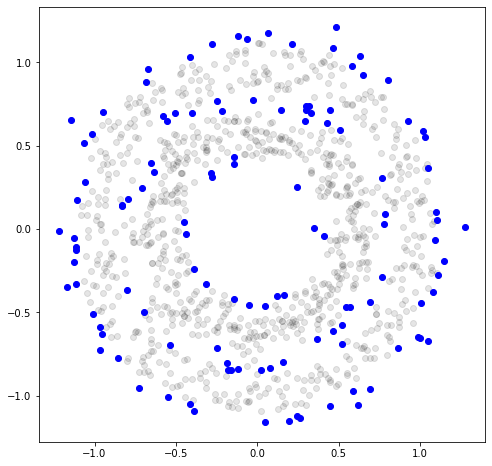

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(X_extend[:,0],X_extend[:,1],color=(0, 0, 0, 0.1))
plt.scatter(noise_manifold.points[:,0],noise_manifold.points[:,1],color=(0, 0, 1, 1))

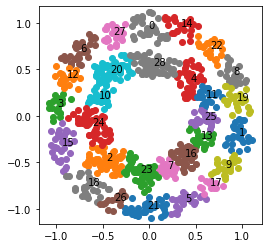

In [26]:
detect_local_mode.Manifold.show(manifolds)

# topological graph

In [27]:
connection=np.array(connection)
BoundaryMat_P=np.zeros((len(manifolds),len(manifolds)),dtype=set)
BoundaryMat_E=np.zeros((len(manifolds),len(manifolds)),dtype=set)
for i in range(len(manifolds)):
    for j in range(i+1,len(manifolds)):
        maski2j = (connection[:,2]==manifolds[i].rt) & (connection[:,3]==manifolds[j].rt)
        maskj2i = (connection[:,2]==manifolds[j].rt) & (connection[:,3]==manifolds[i].rt)
        BoundaryMat_P[i,j] = set(list( connection[maski2j,0].tolist() )) | set(list( connection[maskj2i,1].tolist() ))
        BoundaryMat_P[j,i] = set(list( connection[maskj2i,0].tolist() )) | set(list( connection[maski2j,1].tolist() ))
        BoundaryMat_E[i,j] = BoundaryMat_E[j,i] =connection[maski2j|maskj2i,:2]

Connectivity is 0


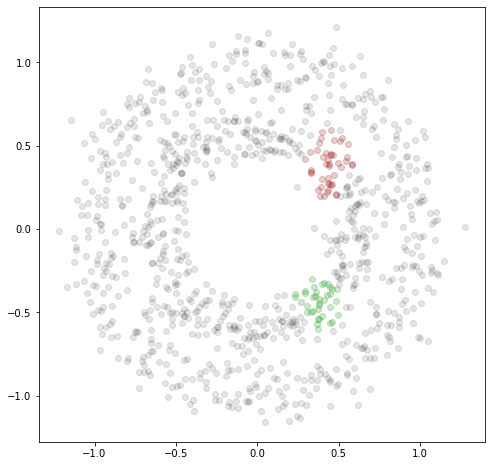

In [28]:
import backbone
imp.reload(backbone)

i,j=4,16

plt.figure(figsize=(8,8))
plt.scatter(X_extend[:,0],X_extend[:,1],color=(0, 0, 0, 0.1))

plt.scatter(manifolds[i].points[:,0],manifolds[i].points[:,1],color=(1, 0, 0, 0.1))
plt.scatter(manifolds[j].points[:,0],manifolds[j].points[:,1],color=(0, 1, 0, 0.1))

plt.scatter(X_extend[list(BoundaryMat_P[i,j]),0],X_extend[list(BoundaryMat_P[i,j]),1],color=(1, 0, 0, 1))
plt.scatter(X_extend[list(BoundaryMat_P[j,i]),0],X_extend[list(BoundaryMat_P[j,i]),1],color=(0, 1, 0, 1))

print('Connectivity is {}'.format(backbone.Backbone.connectivity(i,j,K_d,Dis,BoundaryMat_E,X_extend,manifolds)))

In [29]:
ConnectMat=np.zeros([len(manifolds),len(manifolds)])
for i in range(len(manifolds)):
    for j in range(i+1,len(manifolds)):
        ConnectMat[i,j]=ConnectMat[j,i]=backbone.Backbone.connectivity(i,j,K_d,Dis,BoundaryMat_E,X_extend,manifolds)

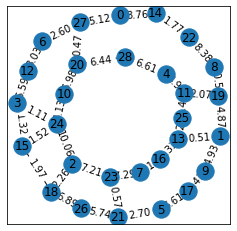

In [30]:
import backbone
imp.reload(backbone)
backbone.Backbone.show_graph(ConnectMat,manifolds)

# prune graph

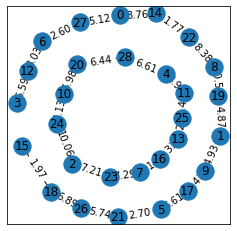

In [31]:
new_ConnectMat=backbone.Backbone.cut_graph(ConnectMat,0.25)
backbone.Backbone.show_graph(new_ConnectMat,manifolds)

# circles

In [39]:
panda=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]

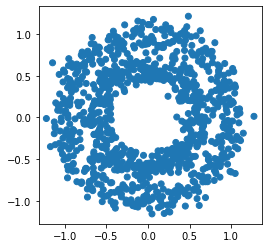

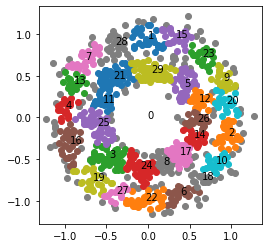

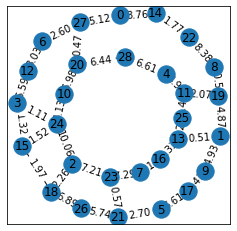

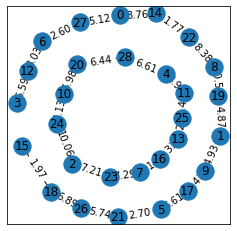

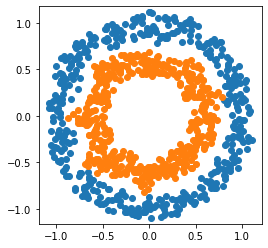

In [44]:
import backbone
imp.reload(backbone)

X,Y_pred,P,W2=backbone.Backbone.fit(X,
                                      K_d=30,
                                      search_n=10,
                                      ratio=0.25,
                                      level=0.4,
                                      pnum=30,
                                      mp4=False,
                                      fps=4,
                                      figroot='/usr/data/gzy/DGC/results/circles',
                                      mp4name='circles'
                                     )

# impossible

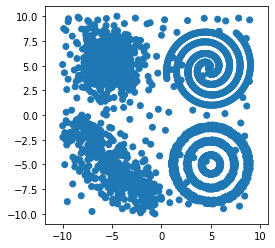

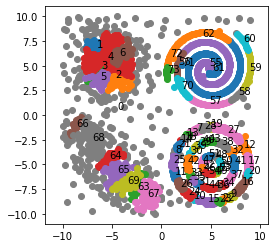

/usr/data/gzy/DGC_copy/backbone.py:51: RuntimeWarning:

invalid value encountered in true_divide



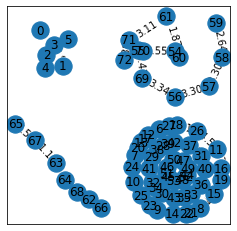

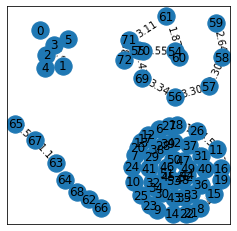

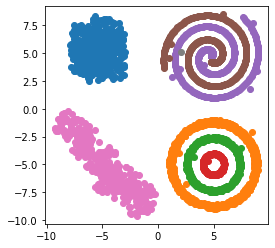

In [35]:
import backbone
imp.reload(backbone)

panda=pd.read_csv('./artificial_csv/impossible.csv', header=None)
X=panda.values[:,:2]

X,Y_pred,P,W2=backbone.Backbone.fit(  X,
                                      K_d=30,
                                      search_n=9,
                                      ratio=0.2,
                                      level=0.4,
                                      pnum=30,
                                      mp4=False,
                                      fps=4,
                                      figroot='/usr/data/gzy/DGC/results/impossible',
                                      mp4name='impossible'
                                     )

# s-set1

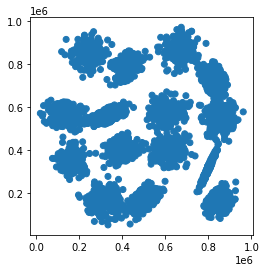

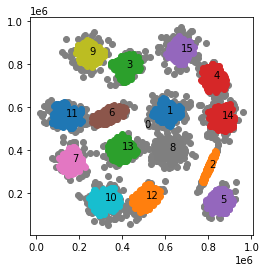

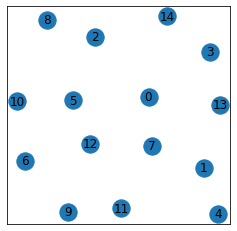

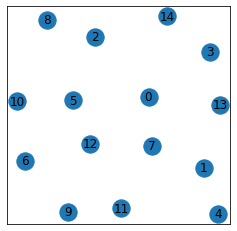

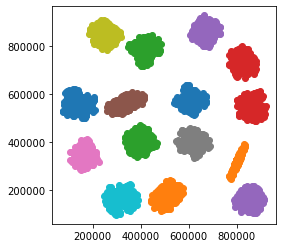

In [36]:
import backbone
imp.reload(backbone)

panda=pd.read_csv('./artificial_csv/s-set1.csv', header=None)
X=panda.values[:,:2]

X,Y_pred,P,W2=backbone.Backbone.fit(X,
                                      K_d=40,
                                      search_n=15,
                                      ratio=0.1,
                                      level=0.4,
                                      pnum=30,
                                      mp4=False,
                                      fps=4,
                                      figroot='/usr/data/gzy/DGC/results/s-set1',
                                      mp4name='s-set1'
                                     )

# smile

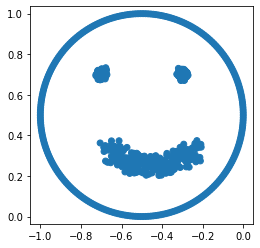

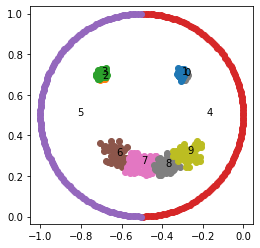

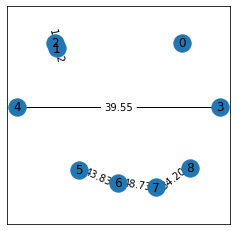

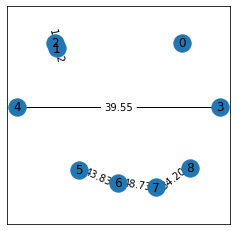

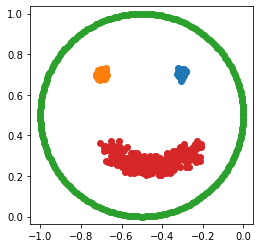

In [37]:
panda=pd.read_csv('./artificial_csv/smile1.csv', header=None)
X=panda.values[:,:2]

X,Y_pred,P,W2=backbone.Backbone.fit(X,
                                      K_d=40,
                                      search_n=20,
                                      ratio=0.1,
                                      level=1,
                                      pnum=30,
                                      mp4=False,
                                      fps=4,
                                      figroot='/usr/data/gzy/DGC/results/smile1',
                                      mp4name='smile1'
                                     )

# moons

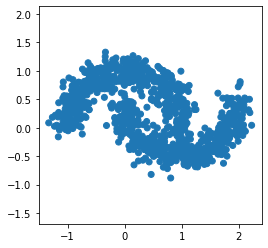

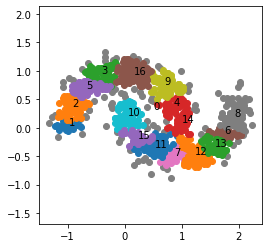

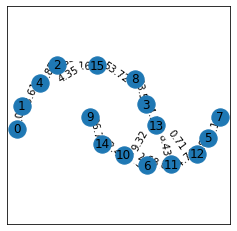

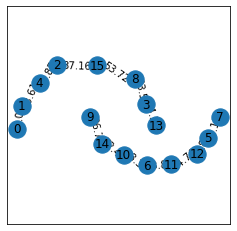

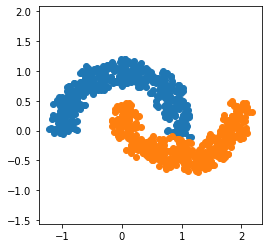

In [38]:
panda=pd.read_csv('./artificial_csv/moons_0.15_noise.csv', header=None)
X=panda.values[:,:2]

X,Y_pred,P,W2=backbone.Backbone.fit(X,
                                      K_d=30,
                                      search_n=20,
                                      ratio=0.5,
                                      level=0.5,
                                      pnum=30,
                                      mp4=False,
                                      fps=4,
                                      figroot='/usr/data/gzy/DGC/results/moons',
                                      mp4name='moons'
                                     )

# 其他方法

https://scikit-learn.org/stable/modules/clustering.html

## 谱聚类

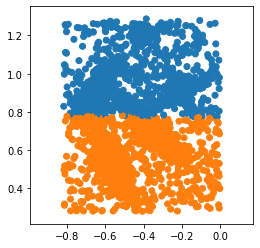

In [198]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X[:,:2])
plot_tools.autoPlot(X[:,:2],clustering.labels_)

## meanshift

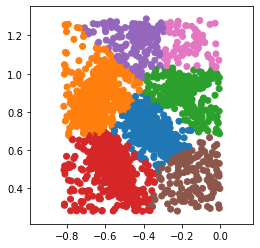

In [204]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X[:,:2], quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X[:,:2])
plot_tools.autoPlot(X[:,:2],ms.labels_)

## k-means

In [1119]:
from sklearn.cluster import MiniBatchKMeans, KMeans
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(X)
autoPlotly(X,k_means.labels_)

## AgglomerativeClustering

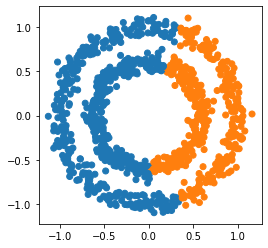

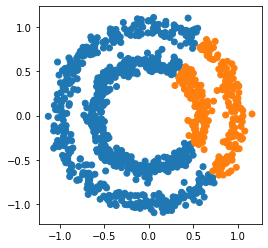

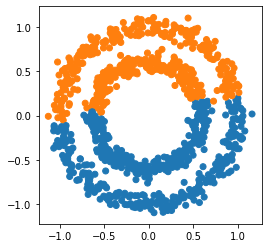

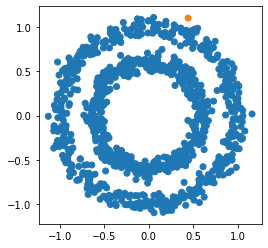

In [1120]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='complete').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='average').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

clustering = AgglomerativeClustering(linkage='single').fit(X)
clustering.fit(X)
autoPlot(X,clustering.labels_)

## AffinityPropagation

/opt/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



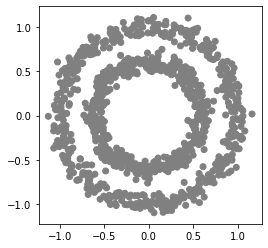

In [1121]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(X)
autoPlot(X,clustering.labels_)

## DBSCAN

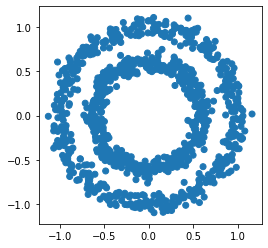

In [1124]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=10).fit(X)
autoPlot(X,clustering.labels_)

## OPTICS

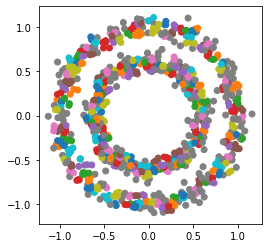

In [1125]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(X)
autoPlot(X,clustering.labels_)